<a href="https://colab.research.google.com/github/MohitSingh351/CIFAR10/blob/main/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Import relevant libraries**

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import pandas as pd
from tensorflow.keras import datasets, models, layers

In [ ]:
(train_x, train_y), (test_x, test_y) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
print(f"Shape of train_x: {train_x.shape}")   # (50000, 32, 32, 3)
# 50000 training samples, Each sample is 32x32, 3 is for rgb channels
print(f"Shape of train_y: {train_y.shape}")

Shape of train_x: (50000, 32, 32, 3)
Shape of train_y: (50000, 1)


In [ ]:
train_y[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
train_y.reshape(-1,)

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [ ]:
test_y.reshape(-1,)

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(X, y, index):
  plt.figure(figsize=(10,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index][0]])

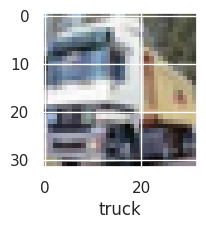

In [ ]:
plot_sample(train_x, train_y, 1)

###**Normalizing the training data**

In [ ]:
train_x = train_x / 255.0
test_x = test_x / 255.0

###**Build simple artificial neural network for image classification**

In [ ]:
BATCH_SIZE = 64

ann = tf.keras.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

In [ ]:
ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(train_x, train_y, epochs=5)

Epoch 1/5
 475/1563 [========>.....................] - ETA: 1:38 - loss: 1.9605 - accuracy: 0.2952

KeyboardInterrupt: 

##**CONVOLUITONAL NEURAL NETWORK**

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),    # 64 is the hidden layer size
    layers.Dense(10, activation='softmax')  # 10 is the output layer size
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(train_x, train_y, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 62s 39ms/step - loss: 1.4257 - accuracy: 0.4882
Epoch 2/10
1563/1563 [==============================] - 57s 37ms/step - loss: 1.0854 - accuracy: 0.6186
Epoch 3/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.9630 - accuracy: 0.6637
Epoch 4/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.8737 - accuracy: 0.6961
Epoch 5/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.8044 - accuracy: 0.7215
Epoch 6/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.7432 - accuracy: 0.7426
Epoch 7/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.6929 - accuracy: 0.7600
Epoch 8/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.6463 - accuracy: 0.7732
Epoch 9/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.6019 - accuracy: 0.7887
Epoch 10/10
1563/1563 [==============================] - 56s 36m

In [ ]:
cnn.evaluate(test_x, test_y)

313/313 [==============================] - 3s 10ms/step - loss: 0.9243 - accuracy: 0.6985


[0.9243124127388, 0.6984999775886536]